In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
dados = [[np.nan, 14],[2,'Ana']]

In [32]:
df = pd.DataFrame(dados)

In [33]:
df.columns = ['coluna1','coluna2']

In [34]:
df.index = ['indice1','indice2']

In [35]:
df

,coluna1,coluna2
indice1,NaN,14
indice2,2.0,Ana


In [36]:
df.isnull ()

,coluna1,coluna2
indice1,True,False
indice2,False,False


In [37]:
# Create a sample dataset
np.random.seed(0)
categories = ['A', 'B', 'C']

data = {
    'Category': np.random.choice(categories, size=300),
    'Value': np.random.normal(10,1,300),

}
df = pd.DataFrame(data)
df

,Category,Value
0,A,10.971832
1,B,11.607674
2,A,9.742872
3,B,11.809818
4,B,10.892348
...,...,...
295,B,10.533863
296,B,8.897869
297,B,10.251739
298,C,11.140511


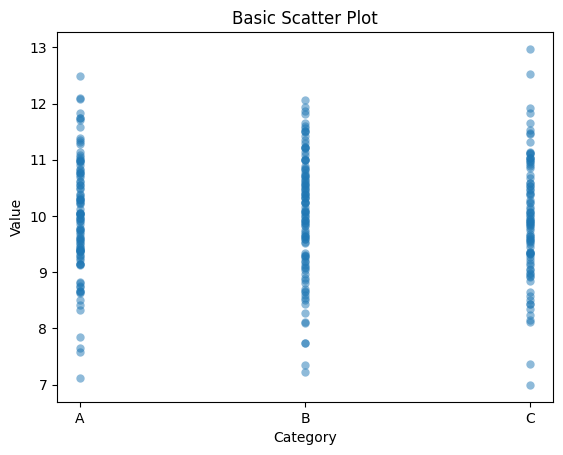

In [38]:
# Create a basic scatter plot
plt.scatter(df['Category'], df['Value'], alpha=0.5, linewidths=0)
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Basic Scatter Plot')
plt.show()

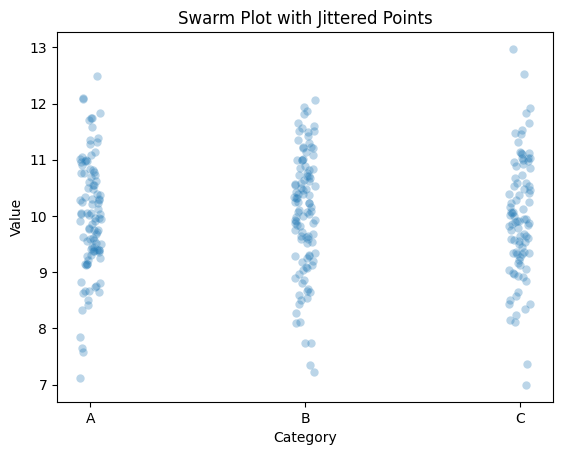

In [39]:
def add_jitter(x, scale=0.05):
    return x + np.random.uniform(-scale, scale, size=len(x))

df['Jittered_Category'] = df['Category'].apply(lambda x: categories.index(x))
df['Jittered_Category'] = add_jitter(df['Jittered_Category'])

# Create a scatter plot with jittered points
plt.scatter(df['Jittered_Category'], df['Value'], alpha=0.3, linewidths=0)
plt.xticks(ticks=range(len(categories)), labels=categories)
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Swarm Plot with Jittered Points')
plt.show()

In [43]:
df

,Category,Value,Jittered_Category,Category_Index,Color
0,A,10.971832,0.039267,0,firebrick
1,B,11.607674,0.945127,1,steelblue
2,A,9.742872,0.010615,0,firebrick
3,B,11.809818,1.003874,1,steelblue
4,B,10.892348,0.978310,1,steelblue
...,...,...,...,...,...
295,B,10.533863,1.011970,1,steelblue
296,B,8.897869,1.009855,1,steelblue
297,B,10.251739,1.029576,1,steelblue
298,C,11.140511,1.959753,2,goldenrod


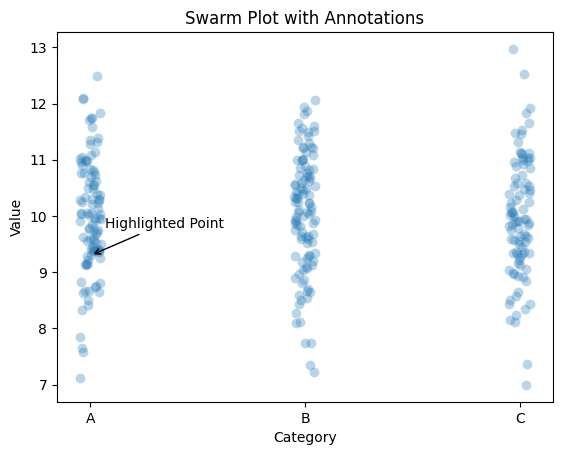

In [40]:
# Add annotations to the plot
plt.scatter(df['Jittered_Category'], df['Value'], s=50, alpha=0.3, linewidths=0)
plt.xticks(ticks=range(len(categories)), labels=categories)
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Swarm Plot with Annotations')

# Highlight a point
highlight = df.iloc[10]
plt.annotate('Highlighted Point', (highlight['Jittered_Category'], highlight['Value']),
             xytext=(10, 20), textcoords='offset points', arrowprops=dict(arrowstyle='->'))

plt.show()

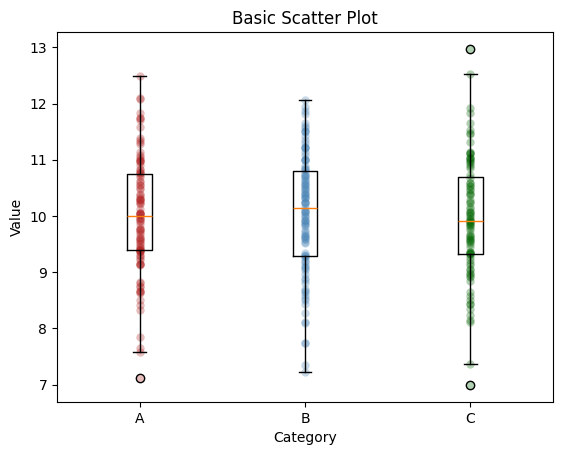

In [41]:
# Create a basic scatter plot
cat_a = df[df['Category']=='A']
cat_b = df[df['Category']=='B']
cat_c = df[df['Category']=='C']

plt.scatter(cat_a['Category'], cat_a['Value'], alpha=0.3, linewidths=0, color='firebrick')
plt.scatter(cat_b['Category'], cat_b['Value'], alpha=0.3, linewidths=0, color='steelblue')
plt.scatter(cat_c['Category'], cat_c['Value'], alpha=0.3, linewidths=0, color='darkgreen')


plt.boxplot (df['Value'][df['Category']=="A"], positions=[0], vert=True)
plt.boxplot (df['Value'][df['Category']=="B"], positions=[1], vert=True)
plt.boxplot (df['Value'][df['Category']=="C"], positions=[2], vert=True)

plt.title('Basic Scatter Plot with Boxplots')
plt.xticks(ticks=[0, 1, 2], labels=['A', 'B', 'C'])
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Basic Scatter Plot')
plt.show()


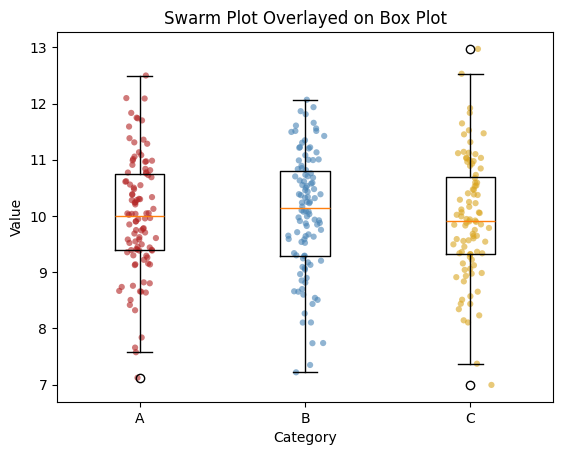

In [42]:
plt.style.use('default')

# Definir as cores manualmente para cada categoria
color_dict = {
    0: 'firebrick',
    1: 'steelblue',
    2: 'goldenrod',

    # Adicione mais se necessário
}

# Aplicar as cores com base na categoria (não no valor jittered!)
# Primeiro mapeamos cada categoria (ex: 'A', 'B', 'C') para um número inteiro
category_to_index = {cat: i for i, cat in enumerate(categories)}
df['Category_Index'] = df['Category'].map(category_to_index)

# Agora usamos esse índice para aplicar a cor
df['Color'] = df['Category_Index'].map(color_dict)

# Criar os valores com jitter para o scatter
df['Jittered_Category'] = df['Category_Index'] + np.random.normal(0, 0.05, size=len(df))

# Criar boxplot
plt.boxplot([df[df['Category'] == cat]['Value'] for cat in categories], positions=range(len(categories)))

# Overlay do swarm plot com cores definidas manualmente
plt.scatter(df['Jittered_Category'], df['Value'], c=df['Color'], s=20, alpha=0.6, linewidths=0)
plt.xticks(ticks=range(len(categories)), labels=categories)
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Swarm Plot Overlayed on Box Plot')
plt.show()
